# EDA for Customer Churn

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv('Data/churn.csv')

In [98]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [99]:
df[df['Churn']==0]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


1. Features details
### Churn: 1 if customer churned and 0 if not churned
### AccountWeeks: number of weeks customer has had active account
### ContractRenewal: 1 if customer recently renewed contract, 0 if not
### DataPlan: 1 if customer has data plan, 0 if not
### MonthlyCharge: average monthly bill

In [100]:
df.shape

(3333, 11)

2. ### Dataset have 3333 rows and 11 features

In [101]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

3. ### There are no null values

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


4. ### Dataset does not have categorical columns

In [103]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


<Axes: >

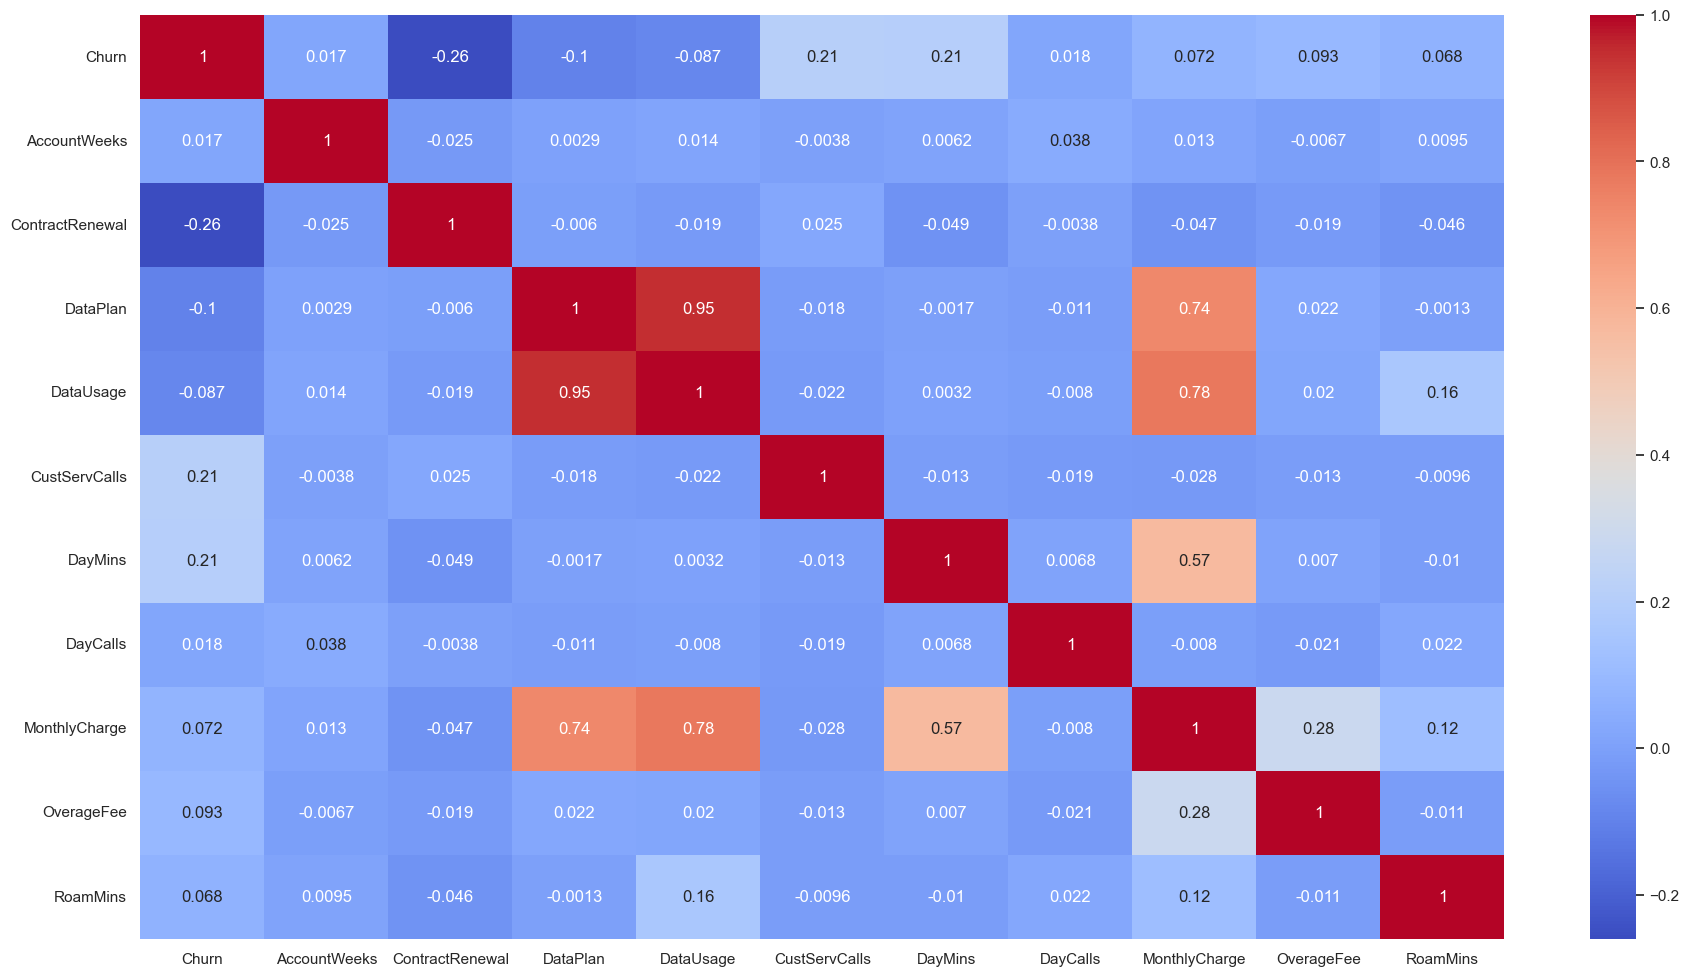

In [104]:
sns.set(rc = {'figure.figsize':(22,12)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

5. ### DataUsage and DataPlan are highly correlated and hence we can remove one of the columns.

In [105]:
df.duplicated().sum()

0

6. ### Dataset does not have any duplicates.

In [106]:
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

Exploring Data

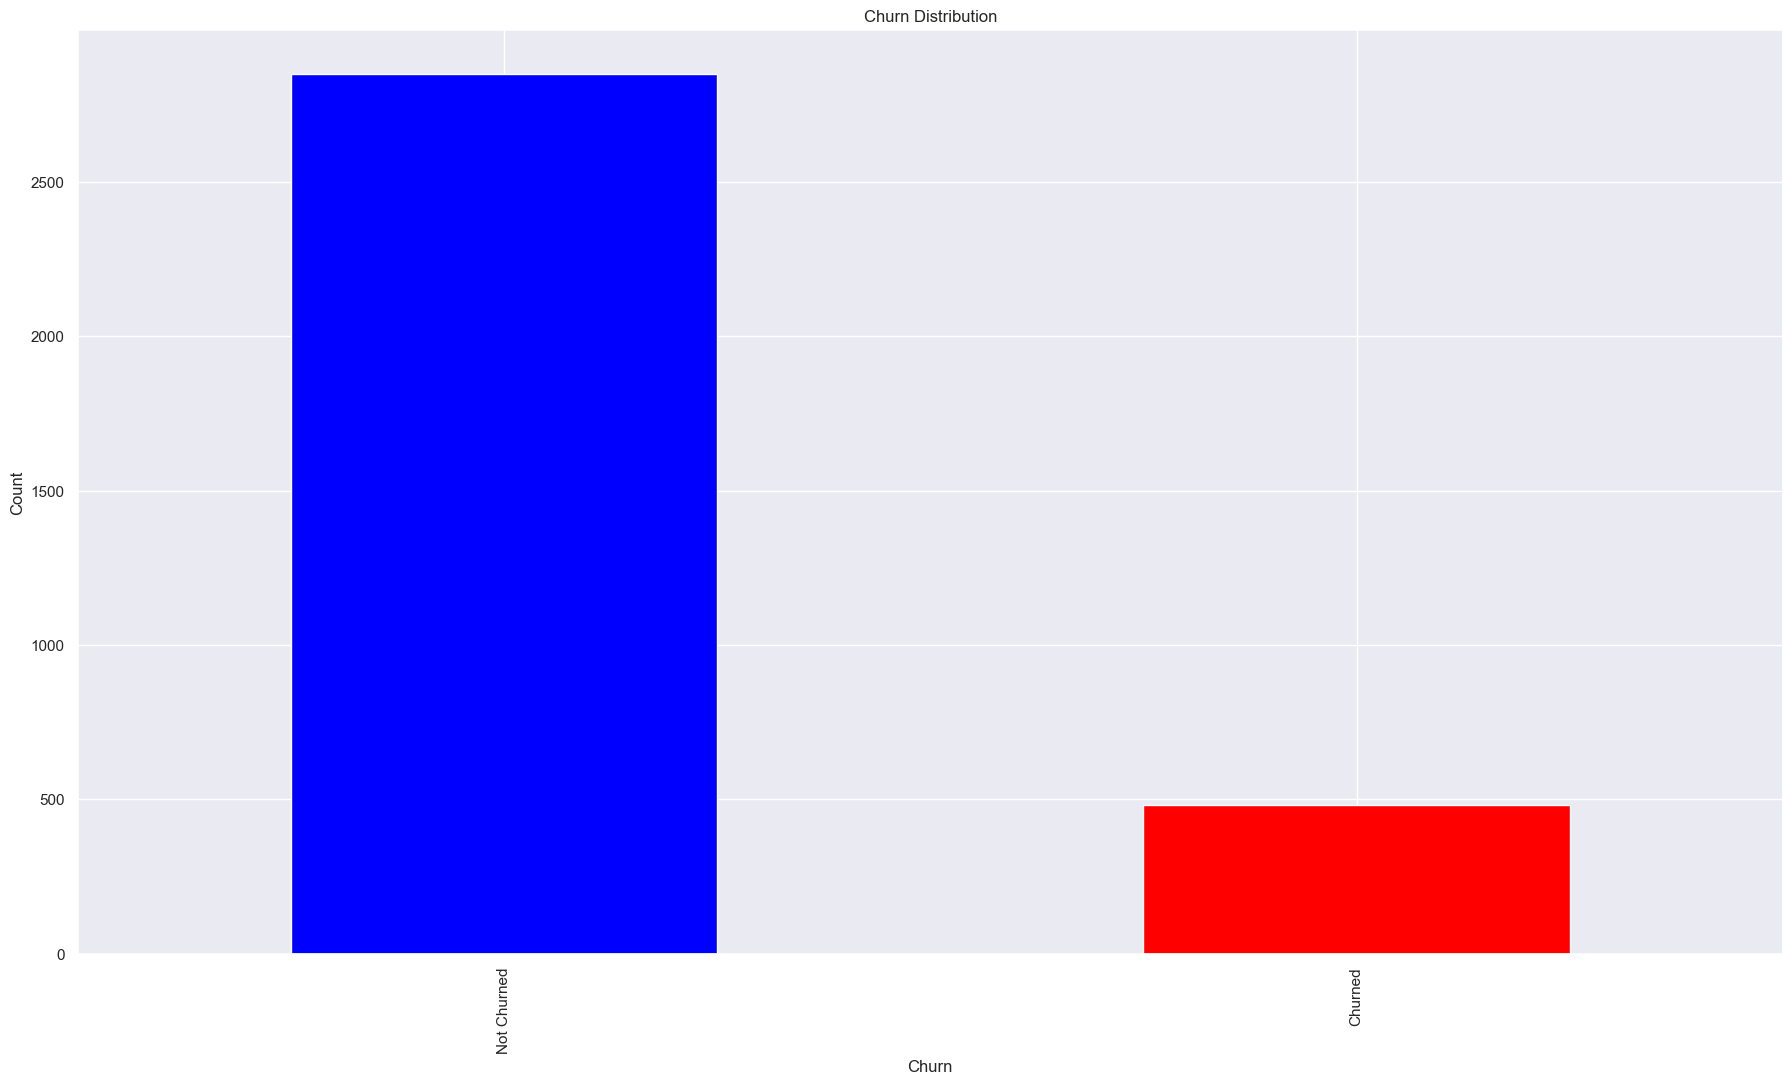

In [107]:
churn_counts = df['Churn'].value_counts()

# Create a bar plot
churn_counts.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')

# Add labels for the bars
plt.xticks([0, 1], ['Not Churned', 'Churned'])

# Show the plot
plt.show()


### Around 500 churned and 2800 were not churned.

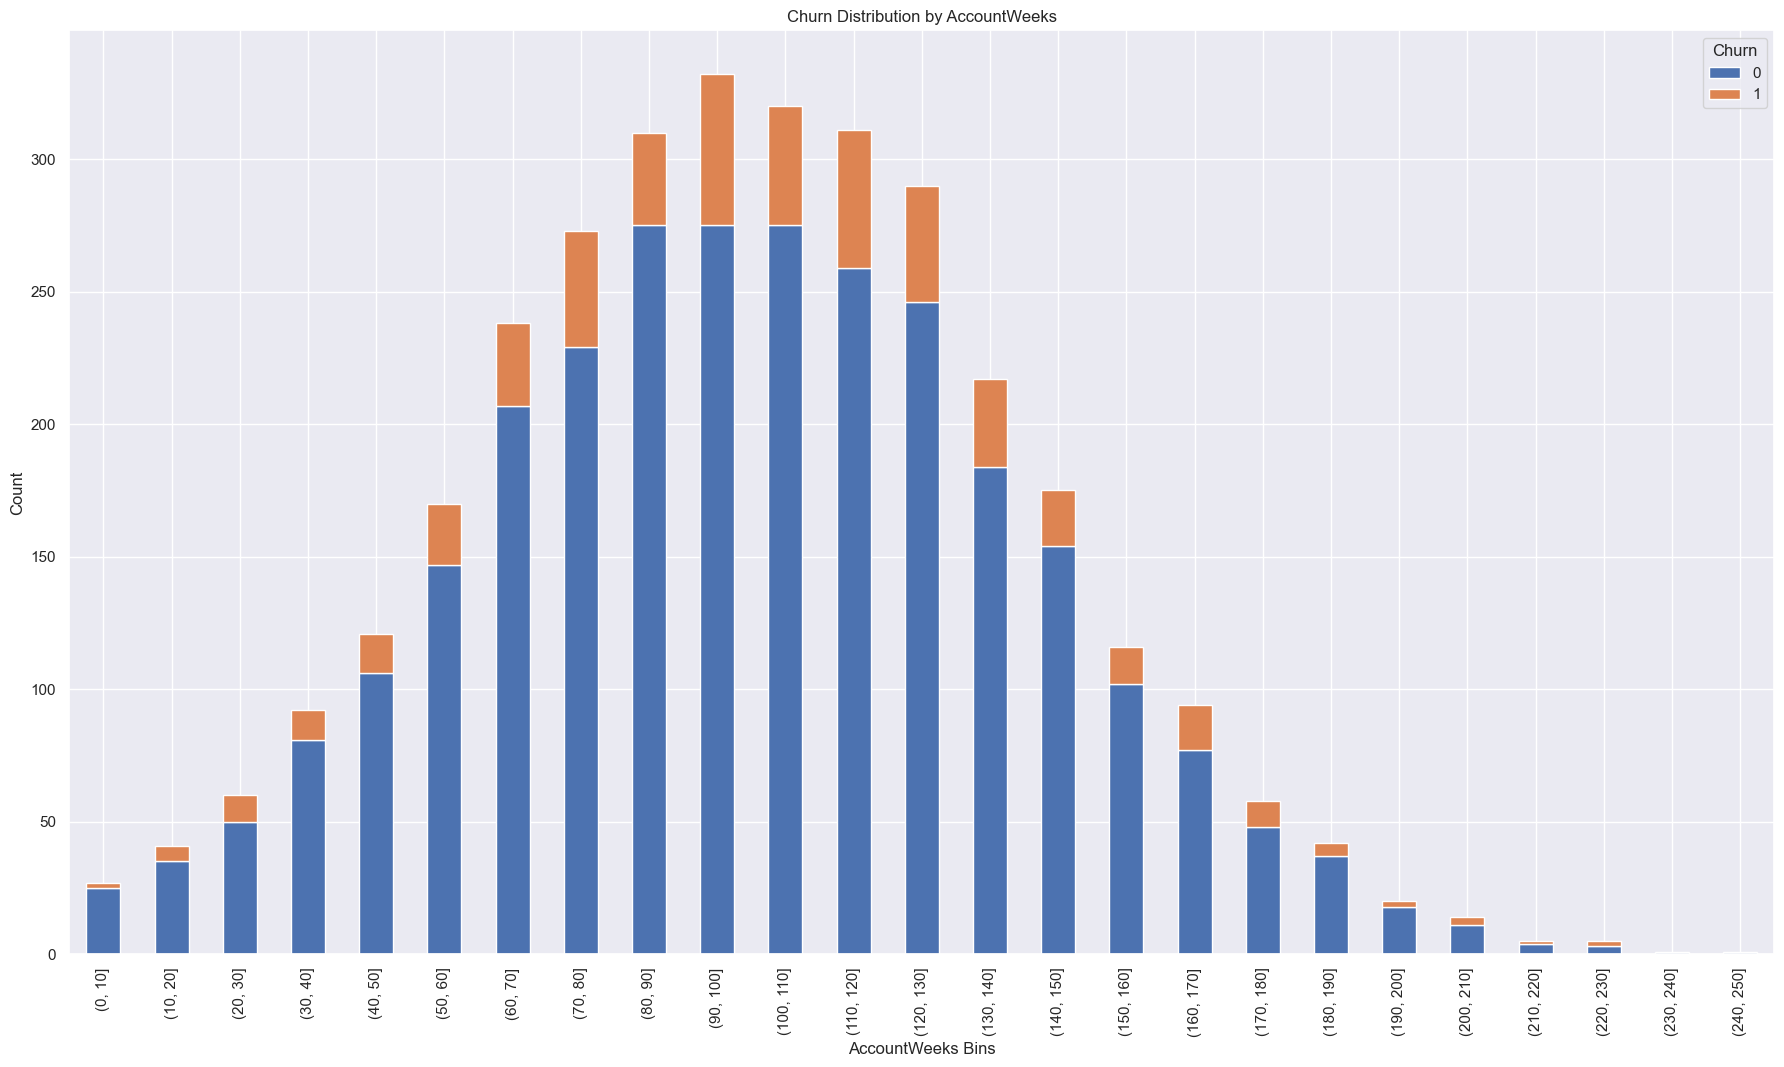

In [108]:
bin_width = 10

bins = range(0, df['AccountWeeks'].max() + bin_width, bin_width)

df['AccountWeeksBin'] = pd.cut(df['AccountWeeks'], bins=bins)
churn_counts = df.groupby('AccountWeeksBin')['Churn'].value_counts().unstack().fillna(0)

churn_counts.plot(kind='bar', stacked=True)

plt.xlabel('AccountWeeks Bins')
plt.ylabel('Count')
plt.title('Churn Distribution by AccountWeeks')

plt.show()

### Insights:
#### Most of the customers had an active plan for 70 to 130 weeks.
#### Most customers having an active plan for 70-130 weeks churned.

In [109]:
a=df[(df['Churn'] == 1) & (df['AccountWeeks'] >= 70) & (df['Churn'] <= 130)]['Churn'].count()/df[df['Churn']==1]['Churn'].count()
a

0.8012422360248447

80% of the customer who got churned were part of the network for 70-130 weeks.

In [110]:
df[(df['Churn'] == 1) & (df['AccountWeeks'] >= 70) & (df['Churn'] <= 130)]['DataPlan'].value_counts()

DataPlan
0    322
1     65
Name: count, dtype: int64

In [111]:
322/387

0.8320413436692506

Out of those 80%(387) customer only 27% had DataPlan which might mean the price of data plan was not suitable for other 83%

In [112]:
df['DataPlan'].value_counts()

DataPlan
0    2411
1     922
Name: count, dtype: int64

In [113]:
df[df['DataPlan']==1]['Churn'].value_counts()

Churn
0    842
1     80
Name: count, dtype: int64

The one who had dataplan and got churned count is only 80 out of 922 which indicates dataplan has direct relation with churn.

In [114]:
df['CustServCalls'].value_counts()

CustServCalls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

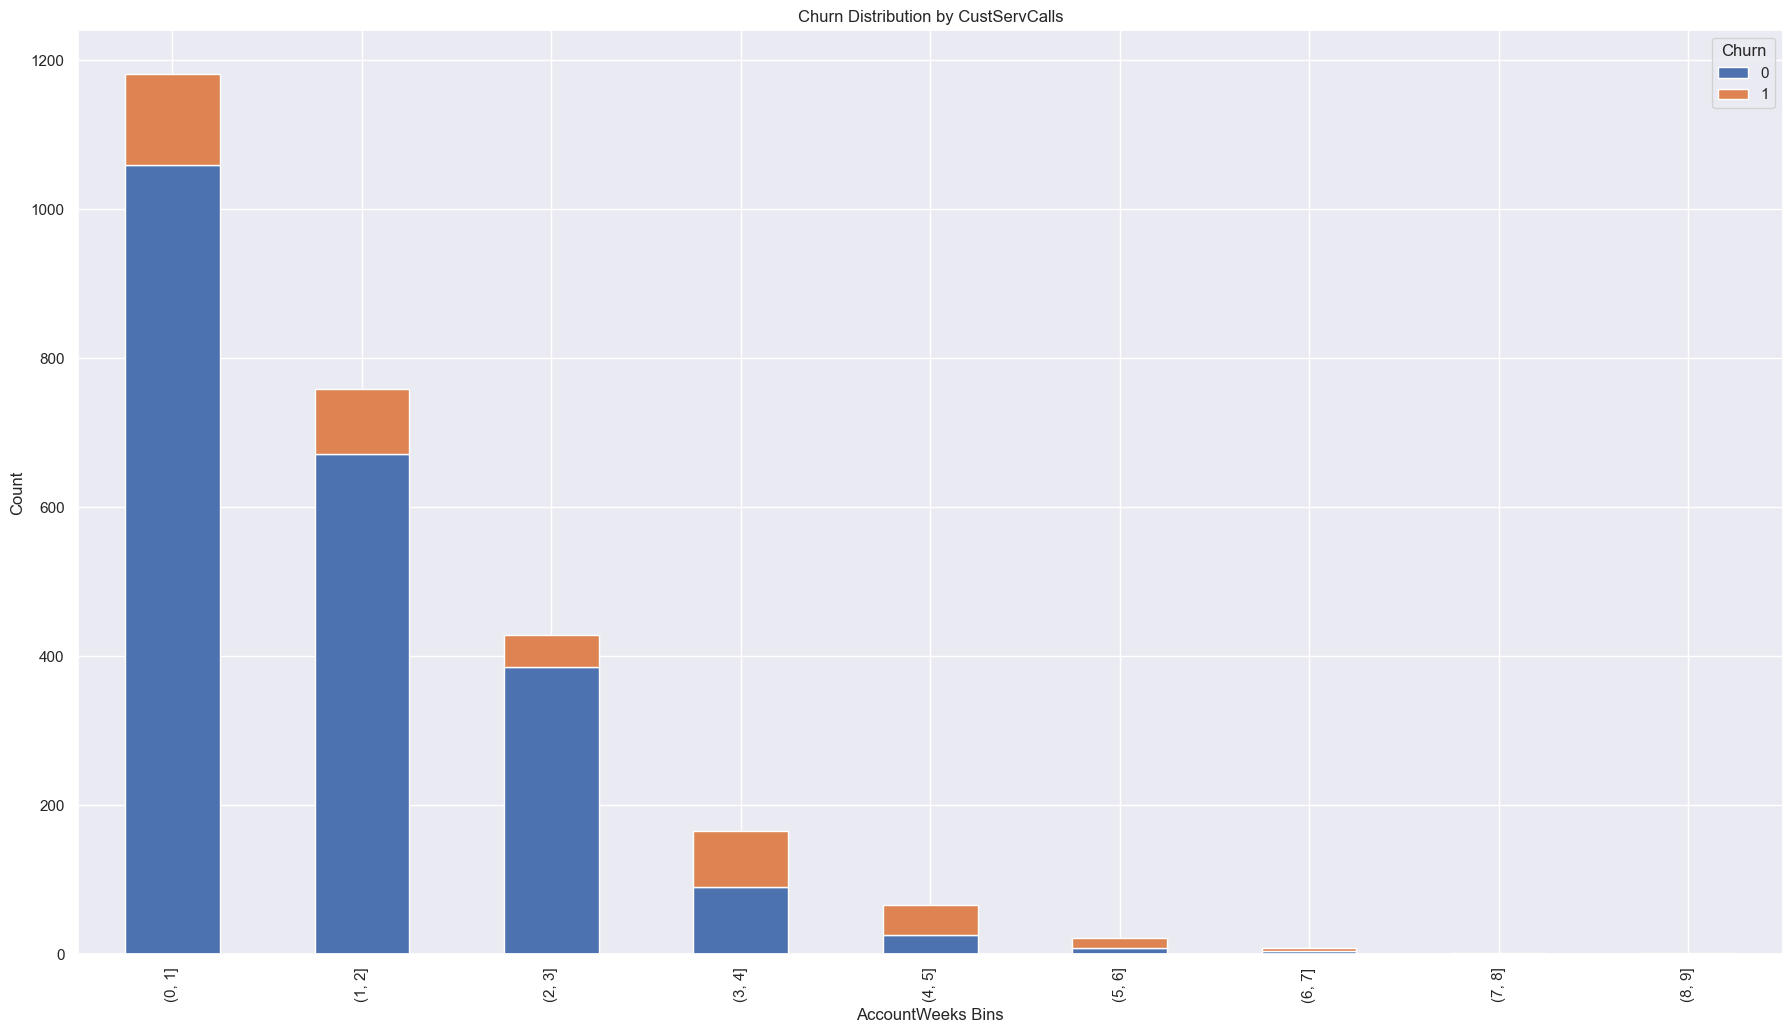

In [115]:
bin_width = 1

bins = range(0, df['CustServCalls'].max() + bin_width, bin_width)

df['CustServCalls'] = pd.cut(df['CustServCalls'], bins=bins)
churn_counts = df.groupby('CustServCalls')['Churn'].value_counts().unstack().fillna(0)

churn_counts.plot(kind='bar', stacked=True)

plt.xlabel('AccountWeeks Bins')
plt.ylabel('Count')
plt.title('Churn Distribution by CustServCalls')

plt.show()

In [116]:
df[df['Churn'] == 1]['ContractRenewal'].value_counts()

ContractRenewal
1    346
0    137
Name: count, dtype: int64

In [117]:
df[df['Churn'] == 0]['ContractRenewal'].value_counts()

ContractRenewal
1    2664
0     186
Name: count, dtype: int64

In [118]:
avg_daymins=179.7
df[df['DayMins']>avg_daymins]['Churn'].value_counts()


Churn
0    1369
1     291
Name: count, dtype: int64

In [119]:
avg_daymins=179.7
df[df['DayMins']<avg_daymins]['Churn'].value_counts()


Churn
0    1480
1     191
Name: count, dtype: int64

The ratio of churned to not churned for DayMins more than average_daymins is more than that of customer having daymins less than average which means customer having more daymins has a higher probability of getting churned. Reason can be high prices or less competitor prices.

In [120]:
avg_monthlycharge=56
df[df['MonthlyCharge']>avg_monthlycharge]['Churn'].value_counts()

Churn
0    1113
1     302
Name: count, dtype: int64

In [121]:
avg_monthlycharge=56
df[df['MonthlyCharge']<avg_monthlycharge]['Churn'].value_counts()

Churn
0    1683
1     178
Name: count, dtype: int64

Here, I could have used average monthly charge of all companies.

Customers paying more than average monthly charge are more likely to get churned.

In [122]:
df[(df['MonthlyCharge']>avg_monthlycharge) & (df['DayMins']>avg_daymins)]['Churn'].value_counts()

Churn
0    752
1    255
Name: count, dtype: int64

# Final Insights:
1. The dataplan prices might not be suitable for the customer and it has direct relation with churn.
2. The ratio of customer being churned to not churned is very less in case of 3 servicecalls made. Also, for customers contacted more than 3 times the churn probability is more.
3. Customer with high daymins than avg are likely to churn( can be offered special price to retain as they contribute to a major proportion of revenue)
4. Customers paying more that average monthly charges are more likely to churn.